In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import plotly.express as pe
import matplotlib.dates as mdates
import talib as tl
import plotly.express as px

In [2]:
import os
print(os.getcwdb())
os.chdir('..')
print(os.getcwdb())

b'C:\\Users\\du\\Desktop\\Git\\Analyzation-of-financial-news-and-stock-price-week_1\\notebooks'
b'C:\\Users\\du\\Desktop\\Git\\Analyzation-of-financial-news-and-stock-price-week_1'


In [3]:
print('Explanatory Data Analysis (EDA) load and display news data')

Explanatory Data Analysis (EDA) load and display news data


In [6]:
data_news = pd.read_csv('../data_1/raw_analyst_ratings.csv')
data_news = pd.DataFrame(data_news)
data_news.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [7]:
print('size of Data set')
data_news.shape

size of Data set


(1407328, 6)

In [8]:
print('overview of the data set')
print(data_news.info())

overview of the data set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None


In [9]:
print('check Missing Values')
missing_values = data_news.isnull().sum()
print('Missing values on the dataset:\n',missing_values)

check Missing Values
Missing values on the dataset:
 Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [10]:
f"Descriptive Statistics Of News Dataset Headline length of news data"

'Descriptive Statistics Of News Dataset Headline length of news data'

In [11]:
data_news['headline_length']=data_news['headline'].apply(len)
headline_states = data_news['headline_length'].describe()
print("headline length statics: ")
print(headline_states)

headline length statics: 
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [12]:
headline_lengths = data_news['headline'].apply(len)
headline_lengths.head(10)

0     39
1     42
2     29
3     44
4     87
5     71
6     73
7    120
8     84
9     42
Name: headline, dtype: int64

In [15]:
#count maximum of news data headline
np.round(headline_lengths.describe(),2)

count    1407328.00
mean          73.12
std           40.74
min            3.00
25%           47.00
50%           64.00
75%           87.00
max          512.00
Name: headline, dtype: float64

In [16]:
#number of published articles in a specific data
publisher_date_counts = data_news['date'].value_counts()
publisher_date_counts.head(10)

date
2020-03-12 00:00:00    1766
2020-02-27 00:00:00    1292
2020-02-28 00:00:00    1239
2019-08-01 00:00:00    1228
2020-03-06 00:00:00    1147
2018-08-02 00:00:00    1138
2009-08-10 00:00:00    1130
2018-10-30 00:00:00    1129
2018-07-26 00:00:00    1125
2019-07-31 00:00:00    1116
Name: count, dtype: int64

In [28]:
#article count per publisher
publisher_counts = data_news['publisher'].value_counts()
print('\n Nuber of Articles per publisher:')
print(publisher_counts)


 Nuber of Articles per publisher:
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


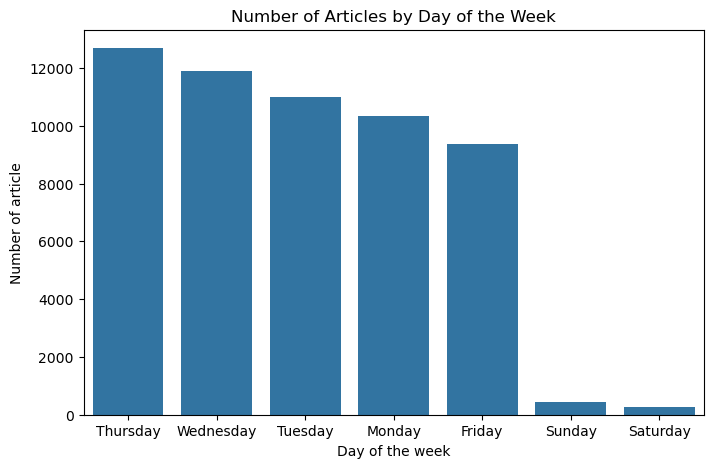

In [35]:
#analyze trends by day of the week
import seaborn as sb
#data_news['date'] = pd.to_datetime(data_news['date'],format = '%Y-%m-%d')
data_news['date'] = data_news['date']
data_news['day_of_week'] = data_news['date'].dt.day_name()
day_of_week_counts = data_news['day_of_week'].value_counts()
# plot the number of articles by day of the week
plt.figure(figsize=(8,5))
sb.barplot(x=day_of_week_counts.index, y = day_of_week_counts.values)
plt.title('Number of Articles by Day of the Week')
plt.xlabel('Day of the week')
plt.ylabel('Number of article')
plt.show()


C:\Users\du\AppData\Local\Temp\ipykernel_7016\2630775547.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data_news['date'].dt.to_period('M').value_counts().sort_index().plot(kind = "line", figsize = (20,6), title = "number of published article in specific date ", xlabel = "Year", ylabel = "number of publisher")


<Axes: title={'center': 'number of published article in specific date '}, xlabel='Year', ylabel='number of publisher'>

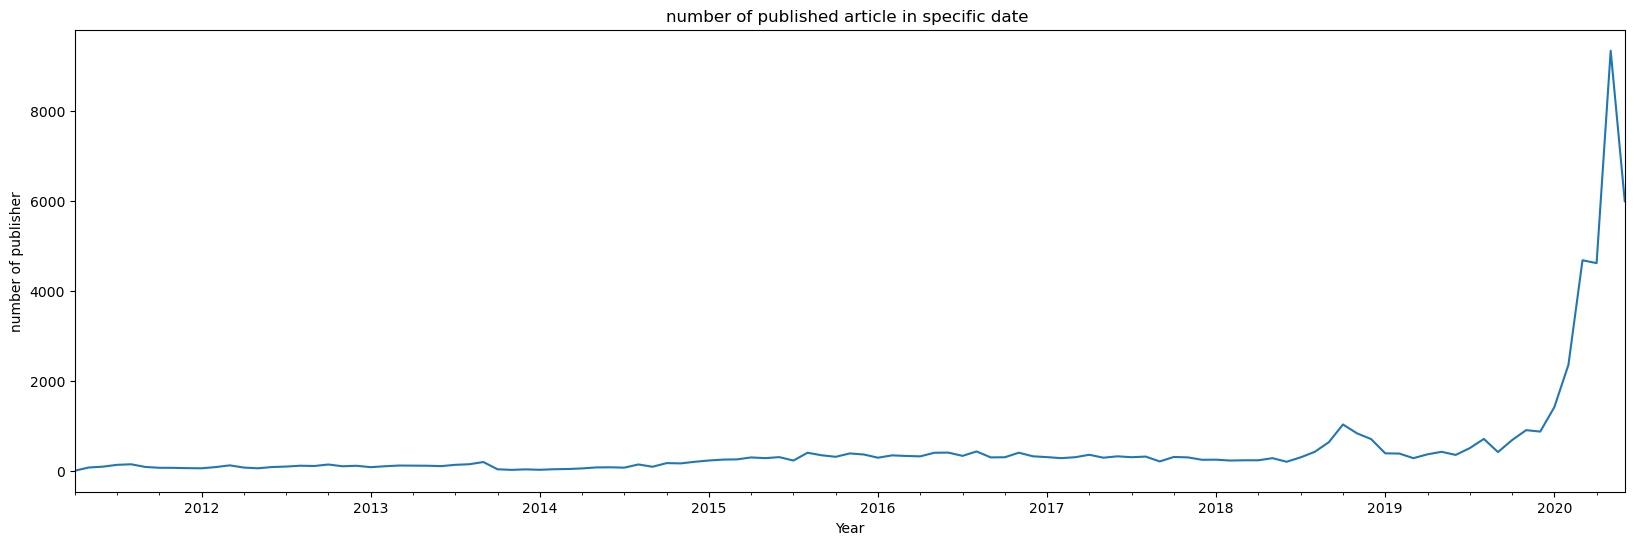

In [37]:
# time series analysis
data_news['date'] = pd.to_datetime(data_news['date'], format = 'ISO8601')
data_news['date'].dt.to_period('M').value_counts().sort_index().plot(kind = "line", figsize = (20,6), title = "number of published article in specific date ", xlabel = "Year", ylabel = "number of publisher")

In [38]:
# Calculate Sentiment analysis on news headline using TextBlob
print(os.getcwdb())

b'C:\\Users\\du\\Desktop\\Git\\Analyzation-of-financial-news-and-stock-price-week_1'


In [ ]:
import sys
import os
scripts_path = os.path.abspath("../scripts")
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

from scripts.financialAnalysis import get_sentiment
data_news['sentiment_score'] = data_news['headline'].apply(get_sentiment)

In [ ]:
# Display Calculated Sentiment
data_news.head()

In [ ]:
#Gauge the sentiment (positive, negative, neutral) associated with the news.
data_news['sentiment_score_word'] = data_news['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))
data_news.head()

In [ ]:
# Sentiment score with respect to date
data_news.groupby('date')['sentiment_score'].mean().plot(figsize=(20,16))